# Predicting Protein Subcellular Localization in Yeast

### CO2: Machine Learning and Pattern Recognition
Inés Calvo Esteva

Date: January 14th 2026



Dataset  utlized for this project can be found here: [Link](https://archive.ics.uci.edu/dataset/110/yeast)

The conda environment needed to execute the following code was that provided for the course on moodle named MLCO2.

# Dataset Background, Structure, and Feature Description

## 1. Historical Context of the Yeast Protein Localization Dataset

The *Saccharomyces cerevisiae* (budding yeast) model organism has played a foundational role in molecular biology and computational biology, particularly in the development of sequence-based predictive models. In 1996, *S. cerevisiae* became the first eukaryotic organism to have its entire genome sequenced, an achievement that marked a major milestone in genomics and systems biology ([Goffeau et al., 1996](https://doi.org/10.1126/science.274.5287.546)). This effort enabled genome-wide analyses of gene function, protein networks, and subcellular organization at an unprecedented scale.

At the time of the genome’s publication, approximately 6,000 open reading frames were identified in the yeast genome. Although many proteins remained functionally uncharacterized, the availability of complete protein sequences catalyzed the development of computational models aimed at predicting various biological properties, including subcellular localization. The yeast proteome was particularly well-suited for such tasks due to its compact genome, the conservation of many essential eukaryotic pathways, and extensive experimental annotation.

The dataset ([Nakai, 1991](https://doi.org/10.24432/C5KG68)) used in this project originates from this formative period in bioinformatics, during which rule-based and statistical approaches were first applied to the problem of predicting protein subcellular localization. It includes 1,484 protein entries, representing roughly 25% of the known yeast proteome at the time. Nakai and Kanehisa initially developed an expert system for predicting localization sites in Gram-negative bacteria ([Nakai & Kanehisa, 1991](https://doi.org/10.1002/prot.340110203)), and soon after extended their methodology to eukaryotic cells, resulting in a knowledge base designed specifically for eukaryotic protein localization prediction ([Nakai & Kanehisa, 1992](https://doi.org/10.1016/S0888-7543(05)80111-9)). This work laid the foundation for curated datasets such as the yeast localization dataset analyzed here.

## 2. Dataset Structure and Feature Descriptions

Each data instance in the yeast protein localization dataset corresponds to a unique protein and is represented by ten columns: one identifier, eight numerical features derived from sequence analysis, and one categorical label indicating the protein’s subcellular localization.

The first column, `Sequence_Name`, contains the UniProt Entry Name (e.g., “ADT1_YEAST”), which serves as a unique identifier in the *S. cerevisiae* proteome. While biologically useful for linking data across resources, this column is excluded from model training due to its lack of predictive value.

The remaining columns comprise eight sequence-derived numerical features. These features were generated using early bioinformatics algorithms developed primarily in the 1980s and 1990s. The features capture sequence-level signals relevant to protein targeting, such as the presence of signal peptides, transmembrane regions, and localization motifs for specific organelles. Although now considered outdated in light of modern machine learning and deep learning techniques, these features were state-of-the-art at the time and retain biological interpretability ([Emanuelsson et al., 2007](https://doi.org/10.1038/nprot.2007.131); [Almagro Armenteros et al., 2017](https://doi.org/10.1093/bioinformatics/btx431)).

Below is a detailed description of each feature:

| Feature | Description                                                                                                                                          |
|---------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| mcg     | Score from McGeoch’s method for predicting signal peptides based on amino acid hydrophobicity and polarity ([McGeoch, 1985](https://doi.org/10.1016/0168-1702(85)90051-6)).                          |
| gvh     | von Heijne's score for identifying likely signal peptide cleavage sites using hydrophobic and charged residue distributions ([von Heijne, 1986](https://doi.org/10.1093/nar/14.11.4683)).      |
| alm     | ALOM transmembrane region score, estimating membrane-spanning alpha helices ([Klein et al., 1985](https://doi.org/10.1016/0005-2736(85)90375-x)).                                                    |
| mit     | Mitochondrial targeting score, detecting sequence characteristics of mitochondrial import signals ([Claros & Vincens, 1996](https://doi.org/10.1111/j.1432-1033.1996.00779.x)).                          |
| erl     | Score reflecting the presence of ER retention signals, such as the KDEL motif ([Pelham, 1988](https://doi.org/10.1002/j.1460-2075.1988.tb02896.x)).                                                        |
| pox     | Score for peroxisomal targeting signals, based on detection of PTS1/PTS2 motifs ([Gould et al., 1989](https://doi.org/10.1083/jcb.108.5.1657); [Subramani, 1998](https://doi.org/10.1152/physrev.1998.78.1.171)).                               |
| vac     | Likelihood of vacuolar targeting, based on sorting motifs associated with Golgi and endosomal pathways ([Jones, 2002](https://doi.org/10.1016/s0076-6879(02)51844-9); [Bowers & Stevens, 2005](https://doi.org/10.1016/j.bbamcr.2005.04.004)).        |
| nuc     | Score for nuclear localization signals (NLS), typically short basic motifs recognized by importins ([Kalderon et al., 1984](https://doi.org/10.1038/311033a0); [Dingwall & Laskey, 1991](https://doi.org/10.1016/0968-0004(91)90184-w)). |

Each feature is expressed as a continuous numerical value, typically normalized between 0 and 1. These features allow models to make biologically interpretable predictions without requiring the raw sequence itself.

## 3. Target Labels and Class Imbalance

The final column of the dataset contains the target class variable, named `localization_site`, which indicates the subcellular location to which the protein is assigned. This is a categorical variable with 10 distinct class values:

| Class | Description                               |
|-------|-------------------------------------------|
| CYT   | Cytoplasmic                               |
| NUC   | Nuclear                                   |
| MIT   | Mitochondrial                             |
| ME1   | Membrane protein, no N-terminal signal    |
| ME2   | Membrane protein, uncleaved signal        |
| ME3   | Membrane protein, cleaved signal          |
| EXC   | Extracellular                             |
| VAC   | Vacuolar                                  |
| POX   | Peroxisomal                               |
| ERL   | Endoplasmic Reticulum                     |

Some classes correspond to classical membrane-bound compartments (e.g., nucleus, mitochondria), while others reflect inferred protein sorting mechanisms. Notably, the ME1–ME3 classes denote membrane proteins that differ in their signal peptide presence and processing, distinguishing between cleaved, uncleaved, or absent N-terminal targeting sequences ([Nakai & Kanehisa, 1991](https://doi.org/10.1002/prot.340110203); [Nakai & Kanehisa, 1992](https://doi.org/10.1016/S0888-7543(05)80111-9)). Each instance in the dataset is annotated with only one localization label, enforcing a single-label classification framework. While this simplification facilitated model development in early computational biology, it does not fully capture the complexity of multi-compartmental localization observed in many eukaryotic proteins.

One of the most critical characteristics of this dataset, as will be seen in more detail in the analysis below, is the highly imbalanced class distribution. A small number of classes, such as CYT, NUC, and MIT, account for the majority of instances, with hundreds of proteins each. In contrast, minority classes such as ERL, POX, and VAC contain only a handful of samples, sometimes fewer than 10. This imbalance reflects biological realities (e.g., some compartments contain more proteins) but introduces substantial challenges for machine learning algorithms.


# Data Analysis

In [1]:
import pandas as pd

# Check dataset and add temporary header for visualisations (Will be removed)

name_column = ["Sequence_Name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "class"]

df = pd.read_csv("data/yeast.data", header = None, names = name_column, sep = r"\s+")

# Check for null values

print(df.isnull().sum())

df.head(10)

Sequence_Name    0
mcg              0
gvh              0
alm              0
mit              0
erl              0
pox              0
vac              0
nuc              0
class            0
dtype: int64


,Sequence_Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
5,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
6,ABC1_YEAST,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
7,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
8,ABF2_YEAST,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,MIT
9,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT


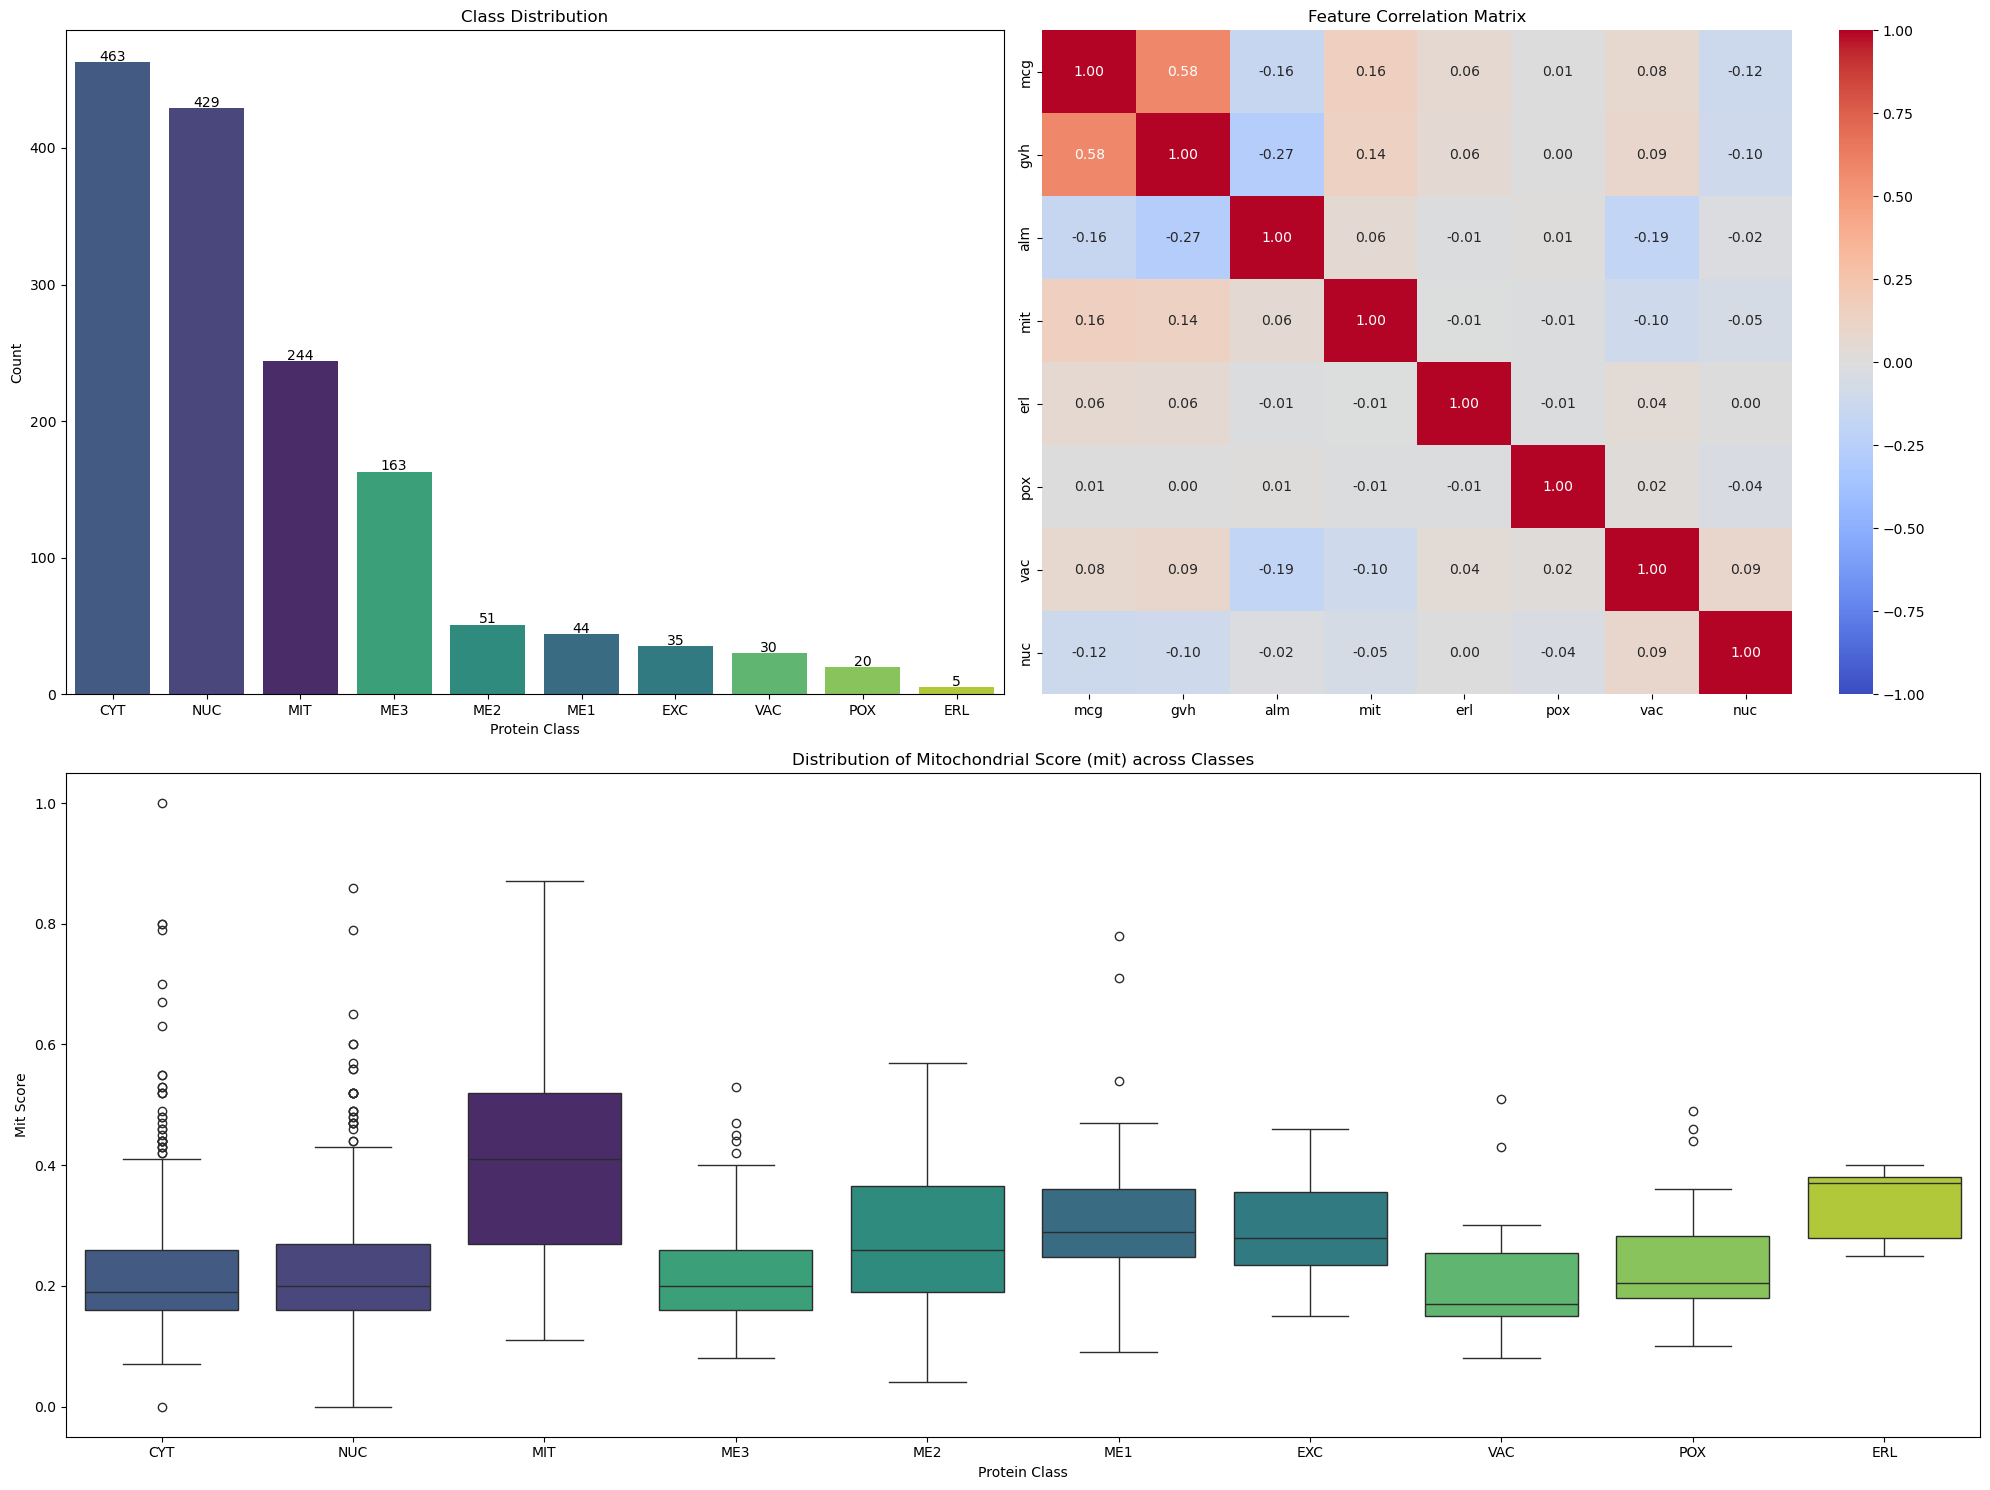

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 15))

# Subplot for multiple figures
ax1 = fig.add_subplot(2, 2, 1)

# Class distribution plot
order = df['class'].value_counts().index

sns.countplot(data=df, x = "class", hue = "class", order = order, ax = ax1, palette = "viridis")
ax1.set_title('Class Distribution')
ax1.set_xlabel('Protein Class')
ax1.set_ylabel('Count')

# Add count annotations above each bar
for p in ax1.patches:
    height = p.get_height()
    ax1.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 1,
        s=int(height), 
        ha='center'
    )

# Correlation heatmap plot
ax2 = fig.add_subplot(2, 2, 2)
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", fmt = ".2f", vmin = -1, vmax = 1, ax = ax2)
ax2.set_title('Feature Correlation Matrix')

# Boxplot of mit score 
ax3 = fig.add_subplot(2, 1, 2)

sns.boxplot(data = df, x = "class", y = "mit", ax = ax3, hue = "class",  legend = False, palette = "viridis", order = order)
ax3.set_title('Distribution of Mitochondrial Score (mit) across Classes')
ax3.set_xlabel('Protein Class')
ax3.set_ylabel('Mit Score')

plt.tight_layout()
plt.show()

The initial step in this analysis was to evaluate the distribution of classes within the datast visualized above. High imbalance was observed such as seen between *CYT* (463 samples) and *ERL* (5 samples). Imbalanced datasets can significantly bias machine learning models which tend to maximizie overall accuracy ignoring minority classes such as *ERL*. To mitigate this, stratified sampling was utilized to preserve class proportions during the train-test split and prioritizing Macro-F1 scores over accuracy to ensure the model's performance is evaluated fairly across all subcellular compartments.

In a further attempt to address class imbalance, experimentation with SMOTE was done but led to no improvement likely due to unrealistic synthetic data points and in an observed increase in false positives. Use of SMOTE was therefore abandoned and cost-sensitive learning was favored with class-weight balancing in our models. However, initial model testing did highlight that certain scarce sample classes simply did not vary enough from more preevelant classes to be differentiated from the model. *VAC* and *POX* were therefore removed to ensure model accuracy on the remaining predictable classes based on the available features.

To further understand the relationship between features, a correlation matrix was generated to identify any potential redundant features. Most features showed relatively low correlation indicating useful information for distiinguishing between localizationsites with the highest found between *mcg* and *gvh* as both relate to signal sequence recognition. Predictive power of a feature was visualized via boxplot of *mit* score which showed as expected the highest for *MIT* class with a higher median as well as broader interquartile range.

In [3]:
# Drop sequence name as doesnt provide predictive value
# Drop VAC and POX

df_clean = df.drop(columns=['Sequence_Name'])
drop_classes = ['VAC', 'POX']
df_clean = df_clean[~df_clean['class'].isin(drop_classes)].copy()

df_clean.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


Label encoding was applied to the target variable containg text (*CYT*, *NUC*, etc.) to map to integers 0-7.

In [4]:
# Lable encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# unique classes to numbers
df_clean["class_encoded"] = label_encoder.fit_transform(df_clean["class"])

# mapping dictionary
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Mapping")
print(label_mapping)

df_clean_encoded = df_clean.drop(columns="class")

df_clean_encoded.head()

Mapping
{'CYT': 0, 'ERL': 1, 'EXC': 2, 'ME1': 3, 'ME2': 4, 'ME3': 5, 'MIT': 6, 'NUC': 7}


,mcg,gvh,alm,mit,erl,pox,vac,nuc,class_encoded
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# separate feature and target by dropping "class_encoded" in X and only this in y
X = df_clean_encoded.drop(columns=['class_encoded'])
y = df_clean_encoded['class_encoded']

# split data (stratified)
# test has 20% data for testing and uses random state 42 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

scaler = StandardScaler()

# fit training data and transform trainding and test data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# results check
print(f"Mean of first feature (Train): {X_train_scaled[:, 0].mean():.2f}")
print(f"Std of first feature (Train): {X_train_scaled[:, 0].std():.2f}")

Mean of first feature (Train): 0.00
Std of first feature (Train): 1.00


In [6]:
# Start testing some baseline models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dummy classifier

dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)


# Logistic regression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# KNN 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


# Performance

print("Baseline Performance:")
print(f"Dummy Accuracy:   {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"LogReg Accuracy:  {accuracy_score(y_test, y_pred_log):.4f}")
print(f"KNN (k=5) Acc:    {accuracy_score(y_test, y_pred_knn):.4f}")


print("\n KNN Classification")
# decoding the class numbers back to names for the report
target_names = [label for label in label_encoder.classes_] 
print(classification_report(y_test, y_pred_knn, target_names=target_names, zero_division=0))

Baseline Performance:
Dummy Accuracy:   0.2195
LogReg Accuracy:  0.6167
KNN (k=5) Acc:    0.5819

 KNN Classification
              precision    recall  f1-score   support

         CYT       0.52      0.62      0.57        93
         ERL       1.00      1.00      1.00         1
         EXC       0.57      0.57      0.57         7
         ME1       0.80      0.89      0.84         9
         ME2       0.33      0.20      0.25        10
         ME3       0.88      0.72      0.79        32
         MIT       0.55      0.55      0.55        49
         NUC       0.58      0.51      0.54        86

    accuracy                           0.58       287
   macro avg       0.65      0.63      0.64       287
weighted avg       0.59      0.58      0.58       287



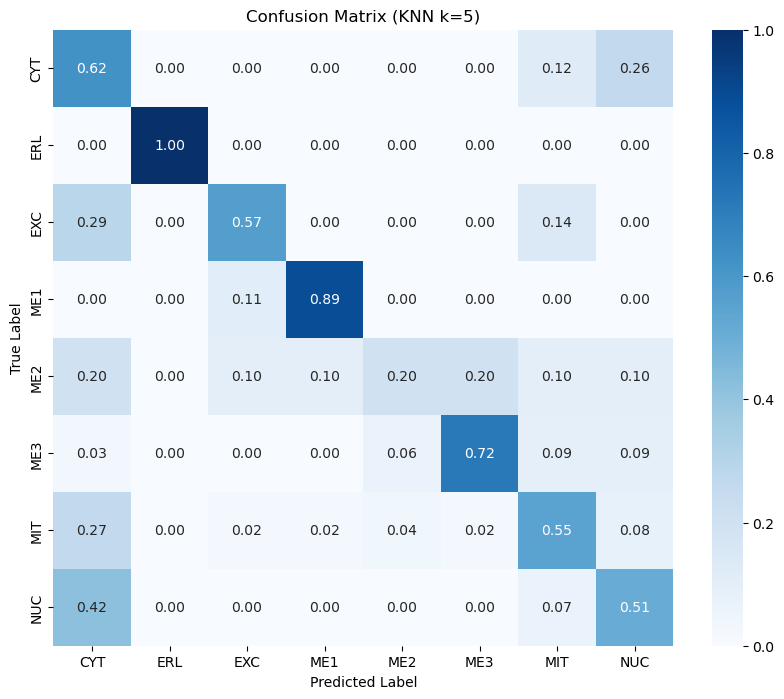

In [21]:
# confusion matrix KNN

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn, normalize = "true")

plt.figure(figsize = (10, 8))

sns.heatmap(cm_knn, annot = True, fmt = ".2f", cmap = 'Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title("Confusion Matrix (KNN k=5)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
# Test more advanced models

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# RandomForestClassifier 

rf = RandomForestClassifier(n_estimators = 100, class_weight = "balanced", random_state = 42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Support vector machine (SVM) -> good for biological sequence classification
# rbf kernel = non-linear relationships
svc = SVC(class_weight = "balanced", kernel = "rbf", random_state = 42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)


# evaluate

print("RandomForest")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_, zero_division=0))
print("SVM")
print(classification_report(y_test, y_pred_svc, target_names=label_encoder.classes_, zero_division=0))

RandomForest
              precision    recall  f1-score   support

         CYT       0.63      0.69      0.66        93
         ERL       1.00      1.00      1.00         1
         EXC       0.80      0.57      0.67         7
         ME1       0.90      1.00      0.95         9
         ME2       0.44      0.40      0.42        10
         ME3       0.87      0.81      0.84        32
         MIT       0.65      0.61      0.63        49
         NUC       0.67      0.65      0.66        86

    accuracy                           0.68       287
   macro avg       0.74      0.72      0.73       287
weighted avg       0.68      0.68      0.68       287

SVM
              precision    recall  f1-score   support

         CYT       0.56      0.63      0.59        93
         ERL       1.00      1.00      1.00         1
         EXC       0.67      0.57      0.62         7
         ME1       0.80      0.89      0.84         9
         ME2       0.36      0.50      0.42        10
       

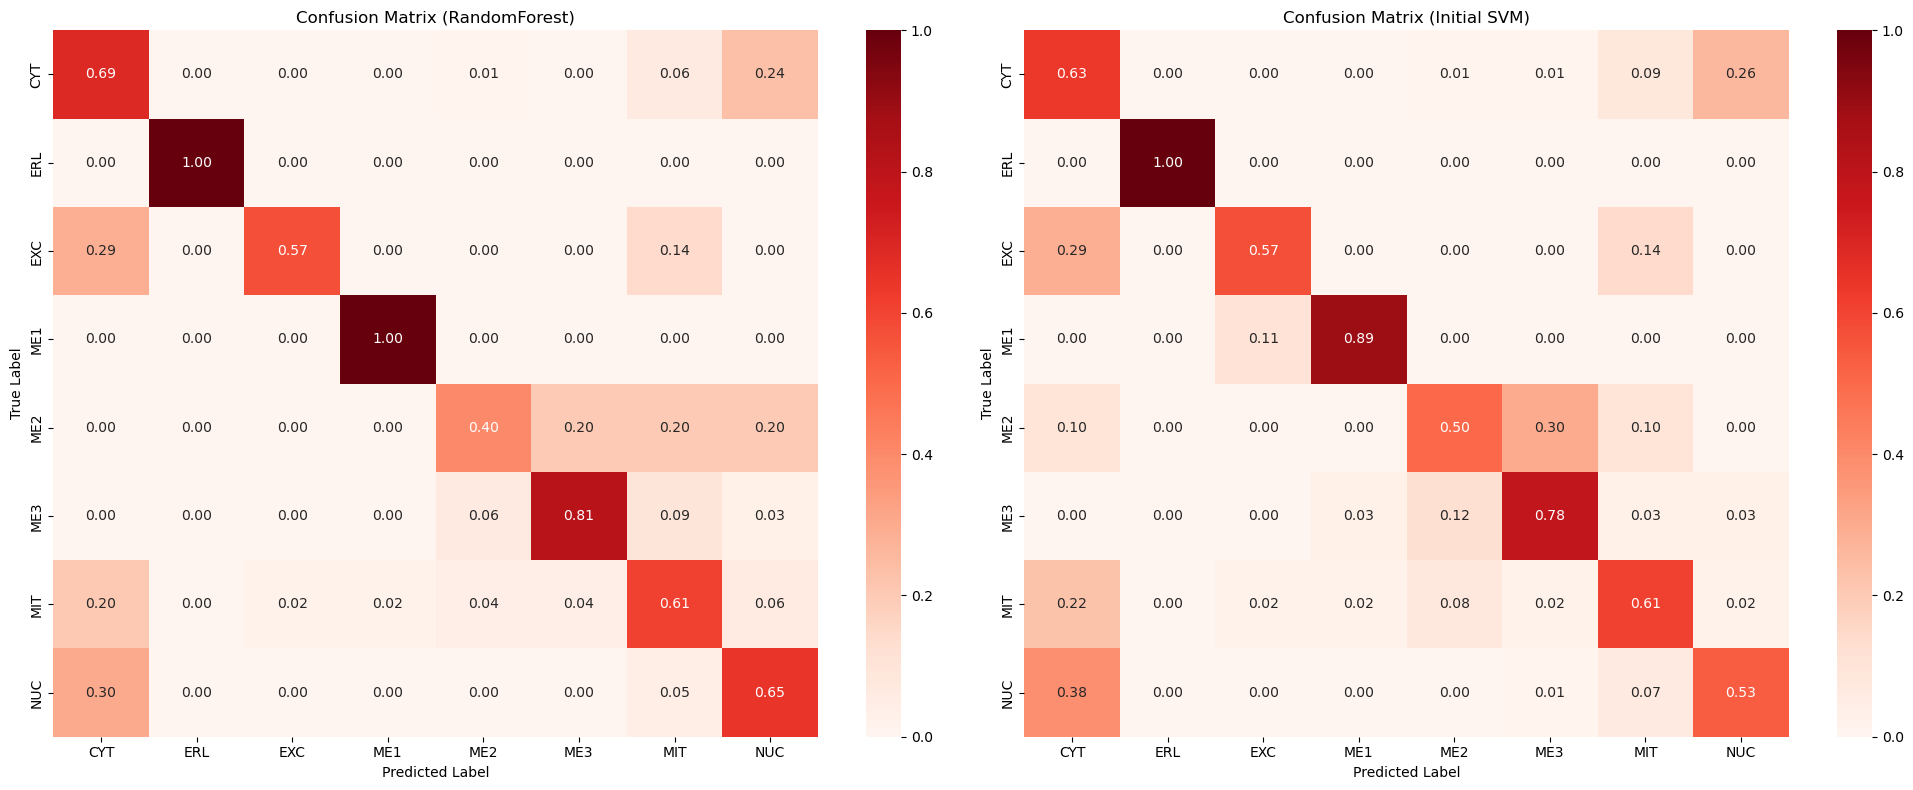

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the normalized matrices for randomforest and svm
cm_rf = confusion_matrix(y_test, y_pred_rf, normalize = "true")
cm_svc = confusion_matrix(y_test, y_pred_svc, normalize = "true")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# RF plot
sns.heatmap(cm_rf, annot = True, fmt = ".2f", cmap = "Reds",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax = axes[0])

axes[0].set_title("Confusion Matrix (RandomForest)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# SVM plot
sns.heatmap(cm_svc, annot=True, fmt='.2f', cmap='Reds',
            xticklabels = label_encoder.classes_, yticklabels = label_encoder.classes_, ax = axes[1])

axes[1].set_title("Confusion Matrix (Initial SVM)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [24]:
# hyperparameter tuning for SVM with grid search
# tune C the strictness of the model and gamma how far a training example can influence

from sklearn.model_selection import GridSearchCV

svc_tune = SVC(random_state = 42, class_weight = "balanced")

# parameter grid, try 3x3 (Cxgamma)
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.1, 0.01, 0.001], 
    "kernel": ["rbf"] 
}

# grid search with 5fold cross validation
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, scoring = "accuracy", verbose = 2)

grid_search.fit(X_train_scaled, y_train)

print("Best params found:")
print(grid_search.best_params_)

print("Best acc score CV:")
print(f"{grid_search.best_score_:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s


c:\Users\Remco\anaconda3\envs\MLCO2\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

In [25]:
# Use tuned model to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("Tuned SVM model")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_, zero_division=0))

Tuned SVM model
              precision    recall  f1-score   support

         CYT       0.56      0.63      0.60        93
         ERL       1.00      1.00      1.00         1
         EXC       0.67      0.57      0.62         7
         ME1       0.73      0.89      0.80         9
         ME2       0.36      0.50      0.42        10
         ME3       0.83      0.78      0.81        32
         MIT       0.62      0.61      0.62        49
         NUC       0.65      0.55      0.59        86

    accuracy                           0.62       287
   macro avg       0.68      0.69      0.68       287
weighted avg       0.63      0.62      0.63       287



In [27]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Step 1: Extract mcg (col 1) and gvh (col 2) from the scaled data
X_train_mcg_gvh = X_train_scaled[:, [1, 2]]
X_test_mcg_gvh = X_test_scaled[:, [1, 2]]

# Step 2: Apply PCA
pca = PCA(n_components=1)
X_train_pca_1d = pca.fit_transform(X_train_mcg_gvh)
X_test_pca_1d = pca.transform(X_test_mcg_gvh)

# Step 3: Convert original scaled data back to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Step 4: Drop mcg and gvh from both
X_train_df = X_train_df.drop(columns=['mcg', 'gvh'])
X_test_df = X_test_df.drop(columns=['mcg', 'gvh'])

# Step 5: Add the new PCA feature
X_train_df['mcg_gvh_pca'] = X_train_pca_1d
X_test_df['mcg_gvh_pca'] = X_test_pca_1d

# Your new training and test data (with PCA instead of mcg/gvh) are ready:
# X_train_df, X_test_df


In [28]:
# Compare Logistic regression and KNN with and without PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logistic regression

log_reg_pca = LogisticRegression(random_state=42, max_iter=1000)
log_reg_pca.fit(X_train_df, y_train)
y_pred_log_pca = log_reg_pca.predict(X_test_df)

# KNN 

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_df, y_train)
y_pred_knn_pca = knn_pca.predict(X_test_df)


# Performance

print("Performance Comparisson: without and with PCA:")
print(f"LogReg Accuracy:  without PCA: {accuracy_score(y_test, y_pred_log):.4f} - with PCA: {accuracy_score(y_test, y_pred_log_pca):.4f} - difference: {accuracy_score(y_test, y_pred_log_pca)-accuracy_score(y_test, y_pred_log):.4f}")
print(f"KNN (k=5) Acc:    without PCA: {accuracy_score(y_test, y_pred_knn):.4f} - with PCA: {accuracy_score(y_test, y_pred_knn_pca):.4f} - difference: {accuracy_score(y_test, y_pred_knn_pca)-accuracy_score(y_test, y_pred_knn):.4f}")

print("\n KNN Classification with PCA:")
# decoding the class numbers back to names for the report
target_names = [label for label in label_encoder.classes_] 
print(classification_report(y_test, y_pred_knn_pca, target_names=target_names, zero_division=0))

Performance Comparisson: without and with PCA:
LogReg Accuracy:  without PCA: 0.6167 - with PCA: 0.6028 - difference: -0.0139
KNN (k=5) Acc:    without PCA: 0.5819 - with PCA: 0.5540 - difference: -0.0279

 KNN Classification with PCA:
              precision    recall  f1-score   support

         CYT       0.50      0.61      0.55        93
         ERL       1.00      1.00      1.00         1
         EXC       0.57      0.57      0.57         7
         ME1       0.38      0.56      0.45         9
         ME2       0.00      0.00      0.00        10
         ME3       0.68      0.66      0.67        32
         MIT       0.62      0.61      0.62        49
         NUC       0.57      0.48      0.52        86

    accuracy                           0.55       287
   macro avg       0.54      0.56      0.55       287
weighted avg       0.55      0.55      0.55       287



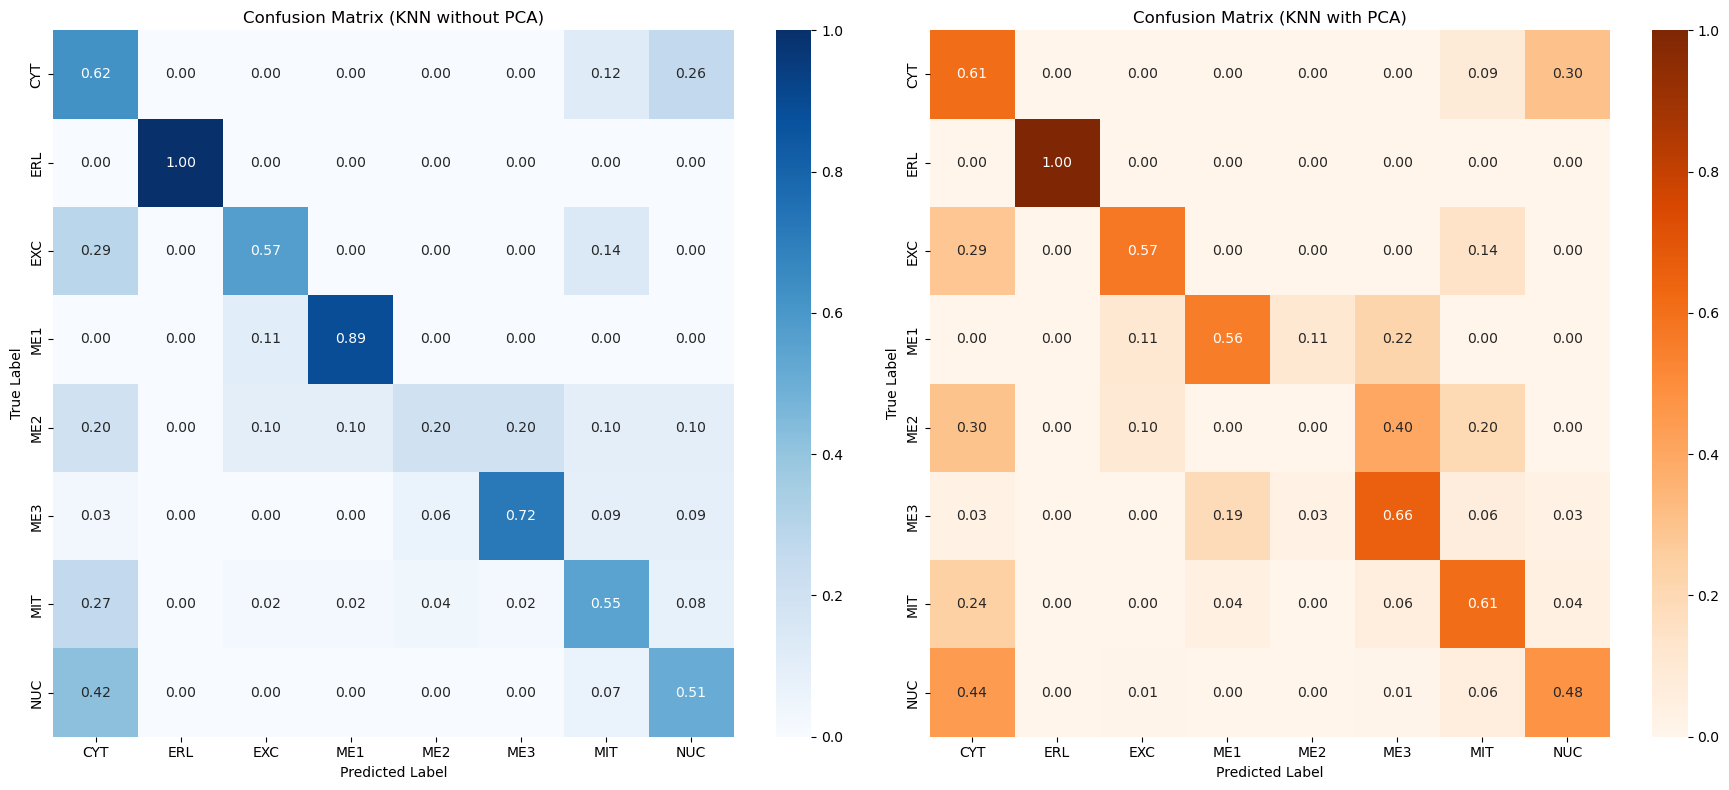

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute normalized confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn, normalize="true")
cm_knn_pca = confusion_matrix(y_test, y_pred_knn_pca, normalize="true")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot baseline KNN confusion matrix
sns.heatmap(cm_knn, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            ax=axes[0])
axes[0].set_title("Confusion Matrix (KNN without PCA)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot KNN + PCA confusion matrix
sns.heatmap(cm_knn_pca, annot=True, fmt=".2f", cmap="Oranges",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            ax=axes[1])
axes[1].set_title("Confusion Matrix (KNN with PCA)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA with 2 components (you can go up to num_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca_2d = pca.fit_transform(X_train_scaled)
X_test_pca_2d = pca.transform(X_test_scaled)

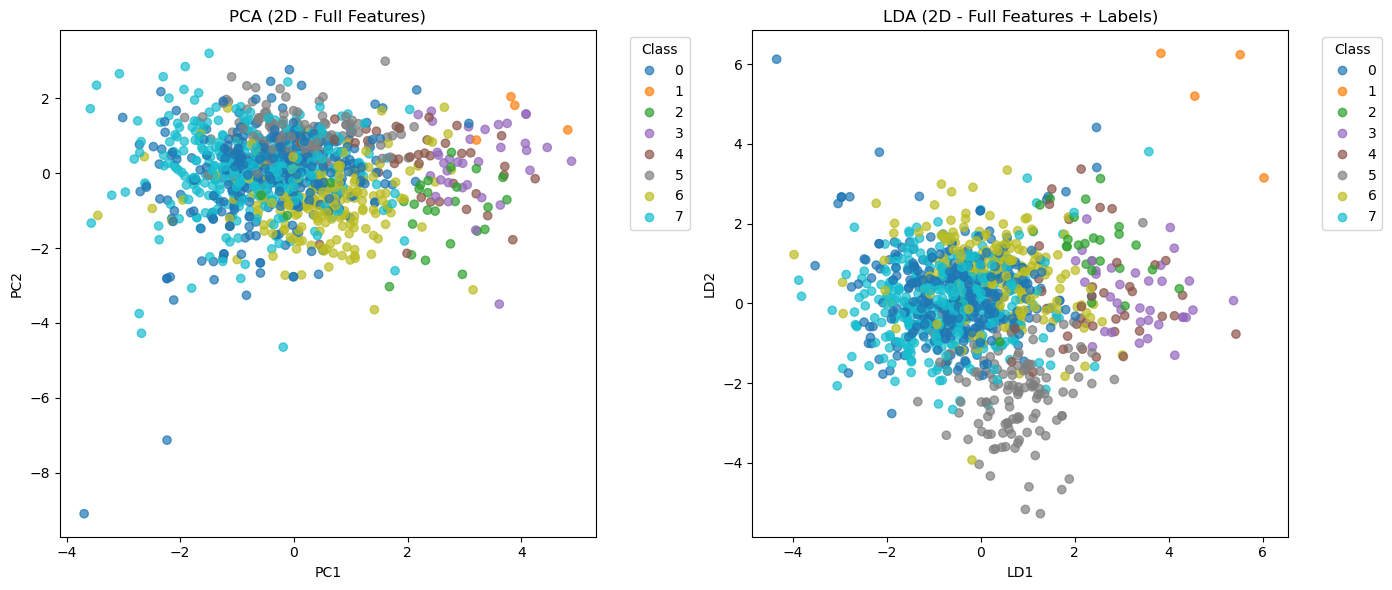

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# PCA 2D scatter
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA (2D - Full Features)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# LDA scatter
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("LDA (2D - Full Features + Labels)")
plt.xlabel("LD1")
plt.ylabel("LD2")

plt.tight_layout()
plt.show()


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train KNN on PCA 2D
knn_pca2d = KNeighborsClassifier()
knn_pca2d.fit(X_train_pca_2d, y_train)
y_pred_pca2d = knn_pca2d.predict(X_test_pca_2d)

# Train KNN on LDA-reduced features
knn_lda = KNeighborsClassifier()
knn_lda.fit(X_train_lda, y_train)
y_pred_lda = knn_lda.predict(X_test_lda)

# Evaluate
print("KNN on PCA-2D-reduced data")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca2d):.4f}")
print(classification_report(y_test, y_pred_pca2d, target_names=label_encoder.classes_, zero_division=0))

print("KNN on LDA-reduced data")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda):.4f}")
print(classification_report(y_test, y_pred_lda, target_names=label_encoder.classes_, zero_division=0))

KNN on PCA-2D-reduced data
Accuracy: 0.4460
              precision    recall  f1-score   support

         CYT       0.42      0.51      0.46        93
         ERL       0.00      0.00      0.00         1
         EXC       0.33      0.29      0.31         7
         ME1       0.64      0.78      0.70         9
         ME2       0.16      0.30      0.21        10
         ME3       0.44      0.34      0.39        32
         MIT       0.57      0.43      0.49        49
         NUC       0.48      0.43      0.45        86

    accuracy                           0.45       287
   macro avg       0.38      0.38      0.38       287
weighted avg       0.46      0.45      0.45       287

KNN on LDA-reduced data
Accuracy: 0.4948
              precision    recall  f1-score   support

         CYT       0.45      0.55      0.50        93
         ERL       1.00      1.00      1.00         1
         EXC       0.50      0.43      0.46         7
         ME1       0.64      0.78      0.70    

### References

- Almagro Armenteros, J. J., Sønderby, C. K., Sønderby, S. K., Nielsen, H., & Winther, O. (2017). DeepLoc: Prediction of protein subcellular localization using deep learning. *Bioinformatics*, 33(21), 3387–3395. [Link](https://doi.org/10.1093/bioinformatics/btx431)

- Bowers, K., & Stevens, T. H. (2005). Protein transport from the late Golgi to the vacuole in the yeast *Saccharomyces cerevisiae*. *Biochimica et Biophysica Acta (BBA) - Molecular Cell Research*, 1744(3), 438–454. [Link](https://doi.org/10.1016/j.bbamcr.2005.04.004)

- Claros, M. G., & Vincens, P. (1996). Computational method to predict mitochondrially imported proteins and their targeting sequences. *European Journal of Biochemistry*, 241(3), 779–786. [Link](https://doi.org/10.1111/j.1432-1033.1996.00779.x)

- Dingwall, C., & Laskey, R. A. (1991). Nuclear targeting sequences — a consensus? *Trends in Biochemical Sciences*, 16(12), 478–481. [Link](https://doi.org/10.1016/0968-0004(91)90184-w)

- Emanuelsson, O., Brunak, S., von Heijne, G., & Nielsen, H. (2007). Locating proteins in the cell using TargetP, SignalP and related tools. *Nature Protocols*, 2(4), 953–971. [Link](https://doi.org/10.1038/nprot.2007.131)

- Goffeau, A., Barrell, B. G., Bussey, H., Davis, R. W., Dujon, B., Feldmann, H., ... & Oliver, S. G. (1996). Life with 6000 genes. *Science*, 274(5287), 546–567. [Link](https://doi.org/10.1126/science.274.5287.546)

- Gould, S. J., Keller, G. A., Hosken, N., Wilkinson, J., & Subramani, S. (1989). A conserved tripeptide sorts proteins to peroxisomes. *The Journal of Cell Biology*, 108(5), 1657–1664. [Link](https://doi.org/10.1083/jcb.108.5.1657)

- Jones, E. W. (2002). Vacuolar proteases and proteolytic artifacts in *Saccharomyces cerevisiae*. *Methods in Enzymology*, 351, 127–150. [Link](https://doi.org/10.1016/s0076-6879(02)51844-9)

- Kalderon, D., Richardson, W. D., Markham, A. F., & Smith, A. E. (1984). Sequence requirements for nuclear location of simian virus 40 large-T antigen. *Nature*, 311(5981), 33–38. [Link](https://doi.org/10.1038/311033a0)

- Klein, P., Kanehisa, M., & DeLisi, C. (1985). The detection and classification of membrane-spanning proteins. *Biochimica et Biophysica Acta (BBA) - Biomembranes*, 815(3), 468–476. [Link](https://doi.org/10.1016/0005-2736(85)90375-x)

- McGeoch, D. J. (1985). On the predictive recognition of signal peptide sequences. *Virus Research*, 3(3), 271–286. [Link](https://doi.org/10.1016/0168-1702(85)90051-6)

- Nakai, K. (1991). *Yeast* [Dataset]. UCI Machine Learning Repository. [Link](https://doi.org/10.24432/C5KG68)

- Nakai, K., & Kanehisa, M. (1991). Expert system for predicting protein localization sites in Gram-negative bacteria. *Proteins: Structure, Function, and Bioinformatics*, 11(2), 95–110. [Link](https://doi.org/10.1002/prot.340110203)

- Nakai, K., & Kanehisa, M. (1992). A knowledge base for predicting protein localization sites in eukaryotic cells. *Genomics*, 14(4), 897–911. [Link](https://doi.org/10.1016/S0888-7543(05)80111-9)

- Pelham, H. R. B. (1988). Evidence that luminal ER proteins are sorted from secreted proteins in a post-ER compartment. *EMBO Journal*, 7(4), 913–918. [Link](https://doi.org/10.1002/j.1460-2075.1988.tb02896.x)

- Subramani, S. (1998). Components involved in peroxisome import, biogenesis, proliferation, turnover, and movement. *Physiological Reviews*, 78(1), 171–188. [Link](https://doi.org/10.1152/physrev.1998.78.1.171)

- von Heijne, G. (1986). A new method for predicting signal sequence cleavage sites. *Nucleic Acids Research*, 14(11), 4683–4690. [Link](https://doi.org/10.1093/nar/14.11.4683)